# Yuhao Zhang(yz7623) and Anyu Chen(ac9250)
# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [24]:
df=pd.read_csv('data/raw_data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### Show 5 rows, selected at random, from the data set.

In [4]:
df.sample(5)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
10645,2017,Queens,West Queens,Women,60+,Black,0.0,0.0,0.0,NaN,0.0,0.0,0.6,0.86,0,0.0,0.0,0.0
27608,2021,Bronx,Pelham - Throgs Neck,All,All,Black,22.0,47.1,7.0,0.90,20.0,42.8,2.9,0.79,33,13.2,0.0,0.0
8477,2017,Manhattan,Central Harlem - Morningside Heights,Women,50 - 59,All,0.0,0.0,0.0,NaN,1.0,8.5,NaN,0.83,8,11.7,0.0,11.7
23406,2020,Brooklyn,East New York,All,30 - 39,All,21.0,73.2,1.0,0.71,8.0,27.9,NaN,0.75,5,8.0,2.0,6.0
7696,2017,Brooklyn,Downtown - Heights - Park Slope,Men,60+,Other/Unknown,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.00,0,0.0,0.0,0.0


### Show each of the column names and their data types.

In [25]:
df.dtypes

Year                                  int64
Borough                              object
UHF                                  object
Gender                               object
Age                                  object
Race                                 object
HIV diagnoses                       float64
HIV diagnosis rate                  float64
Concurrent diagnoses                float64
% linked to care within 3 months    float64
AIDS diagnoses                      float64
AIDS diagnosis rate                 float64
PLWDHI prevalence                   float64
% viral suppression                 float64
Deaths                                int64
Death rate                          float64
HIV-related death rate              float64
Non-HIV-related death rate          float64
dtype: object

### Show the unique features.

In [26]:
df.nunique()

Year                                  10
Borough                                6
UHF                                   43
Gender                                 6
Age                                    8
Race                                   7
HIV diagnoses                        409
HIV diagnosis rate                  1963
Concurrent diagnoses                 157
% linked to care within 3 months     125
AIDS diagnoses                       313
AIDS diagnosis rate                 1525
PLWDHI prevalence                    169
% viral suppression                  170
Deaths                               374
Death rate                           757
HIV-related death rate               422
Non-HIV-related death rate           589
dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### Delete the unneccessary columns for the data.

In [27]:
dropped_columns = ['UHF', '% linked to care within 3 months', 'Non-HIV-related death rate', 'PLWDHI prevalence', '% viral suppression']
df = df.drop(columns=dropped_columns)

### Show the 5 rows randomly.

In [28]:

df.sample(5)

,Year,Borough,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,AIDS diagnoses,AIDS diagnosis rate,Deaths,Death rate,HIV-related death rate
15686,2018,Queens,Men,60+,Latinx/Hispanic,3.0,45.0,1.0,1.0,15.0,1,0.0,0.0
12330,2018,Brooklyn,Men,40 - 49,White,0.0,0.0,0.0,1.0,22.9,0,0.0,0.0
1828,2012,Manhattan,Male,All,Other/Unknown,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
20624,2019,Queens,Men,All,Latinx/Hispanic,1.0,9.3,0.0,1.0,9.3,2,0.0,0.0
13693,2018,Manhattan,All,40 - 49,Asian/Pacific Islander,2.0,49.8,0.0,0.0,0.0,0,0.0,0.0


### Delete the rows without specific Age and specific borough

In [29]:
df = df[df['Age'] != 'All']
df = df[df['Borough'] != 'All']


### Show the 5 random rows.

In [31]:
df.sample(5)

,Year,Borough,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,AIDS diagnoses,AIDS diagnosis rate,Deaths,Death rate,HIV-related death rate
15229,2018,Queens,Men,18 - 29,Black,4.0,280.3,0.0,0.0,0.0,0,0.0,0.0
22500,2020,Bronx,Women,18 - 29,Asian/Pacific Islander,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN
18399,2019,Brooklyn,Women,18 - 29,Other/Unknown,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN
14461,2018,Manhattan,All,60+,Black,0.0,0.0,0.0,2.0,42.7,3,6.0,0.0
23372,2020,Brooklyn,Women,30 - 39,Black,7.0,44.7,2.0,5.0,32.0,0,0.0,0.0


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. Calculate the sum of deaths

In [32]:
df['Deaths'].sum()

114790

### 2. Calculate the number of people in each age group and race

In [33]:
df['Age'].value_counts()

Age
30 - 39    4800
40 - 49    4800
50 - 59    4800
60+        4800
18 - 29    4320
13 - 19     480
20 - 29     480
Name: count, dtype: int64

In [34]:
df['Race'].value_counts()

Race
All                       6480
Asian/Pacific Islander    3600
Black                     3600
Other/Unknown             3600
White                     3600
Latinx/Hispanic           3600
Name: count, dtype: int64

### 3. HIV-related death rates by borough
We can get the average HIV-related death rate for each borough in the dataset. This analysis helps us understand the impact of HIV-related deaths across different areas.

In [35]:
avg_hiv_related_death_rate = df.groupby("Borough")["HIV-related death rate"].mean()
print(avg_hiv_related_death_rate)

Borough
All              2354.666863
Bronx            2489.180487
Brooklyn         2524.822394
Manhattan        2530.953680
Queens           2580.028892
Staten Island    2736.837010
Name: HIV-related death rate, dtype: float64


### 4. Age distribution of HIV diagnoses
We can get the percentage of HIV diagnoses for each age group based on the dataset. It helps identify which age groups are most affected by HIV.

In [36]:
total_hiv_diagnoses_by_age = df.groupby("Age")["HIV diagnoses"].sum()
total_hiv_diagnoses_percentage = (total_hiv_diagnoses_by_age / total_hiv_diagnoses_by_age.sum()) * 100
print("Percentage of HIV Diagnoses by Age Group:")
print(total_hiv_diagnoses_percentage)

Percentage of HIV Diagnoses by Age Group:
Age
13 - 19     1.305752
18 - 29    26.450204
20 - 29    10.438436
30 - 39    28.150260
40 - 49    15.928358
50 - 59    11.833664
60+         5.893326
Name: HIV diagnoses, dtype: float64


### 5. Group by gender and calculate average HIV diagnosis rate and sort the results in descending order 
It provides the average HIV diagnosis rate for each gender group, sorted in descending order. It helps us identify which gender group has the highest average diagnosis rate.

In [40]:
avg_hiv_diagnosis_rate_by_gender = df.groupby("Gender")["HIV diagnosis rate"].mean()
avg_hiv_diagnosis_rate_by_gender_sorted = avg_hiv_diagnosis_rate_by_gender.sort_values(ascending=False)
print("Average HIV Diagnosis Rate by Gender (Sorted):")
print(avg_hiv_diagnosis_rate_by_gender_sorted)

Average HIV Diagnosis Rate by Gender (Sorted):
Gender
Male      53.533958
Men       30.151954
All       20.922793
Female    14.403472
Women      7.773031
Name: HIV diagnosis rate, dtype: float64


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Trends in HIV diagnoses and AIDS diagnoses over the years
This line chart shows the trends in HIV diagnoses and AIDS diagnoses over the years. It helps visualize any patterns or changes in diagnoses rates over time.

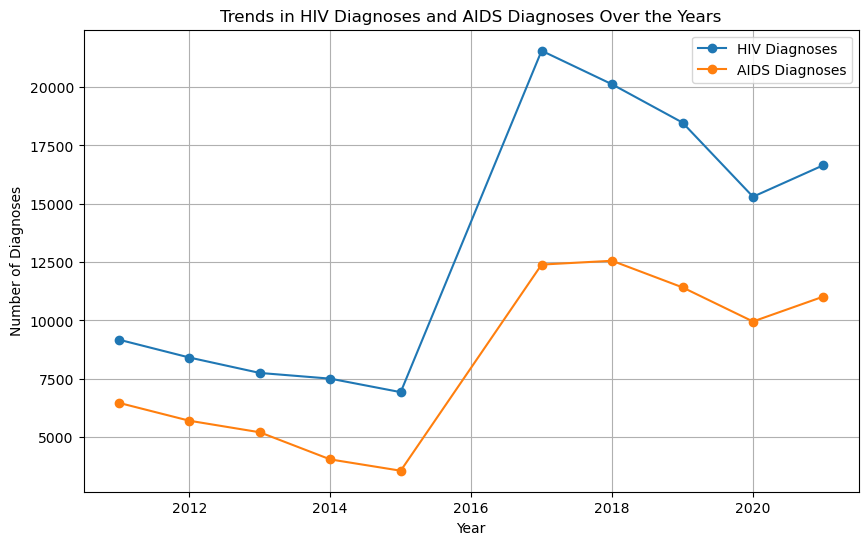

In [43]:
total_hiv_diagnoses = df.groupby("Year")["HIV diagnoses"].sum()
total_aids_diagnoses = df.groupby("Year")["AIDS diagnoses"].sum()


plt.figure(figsize=(10, 6))
plt.plot(total_hiv_diagnoses.index, total_hiv_diagnoses.values, label="HIV Diagnoses", marker='o')
plt.plot(total_aids_diagnoses.index, total_aids_diagnoses.values, label="AIDS Diagnoses", marker='o')
plt.title("Trends in HIV Diagnoses and AIDS Diagnoses Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Diagnoses")
plt.legend()
plt.grid(True)
plt.show()

### 2. Age distribution of HIV diagnoses
This bar chart displays the age distribution of HIV diagnoses, helping identify which age groups are most affected by HIV.

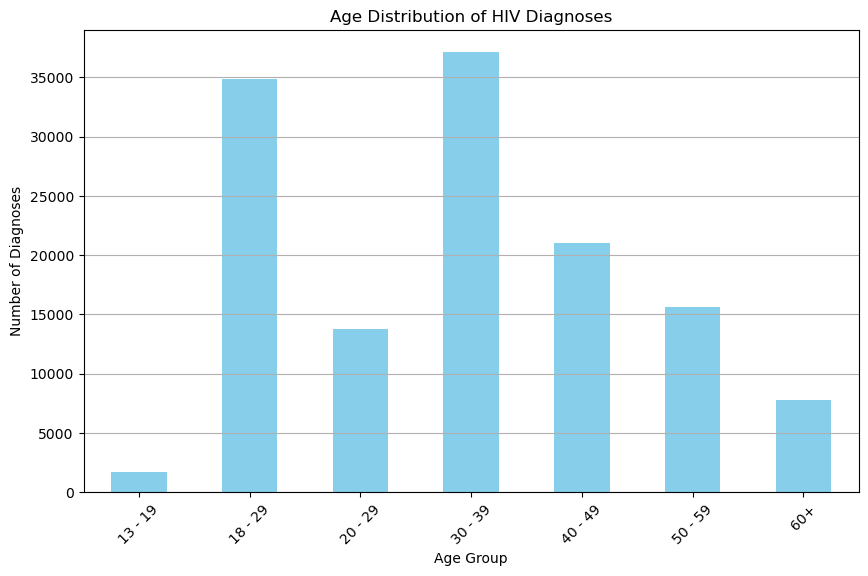

In [44]:
total_hiv_diagnoses_by_age = df.groupby("Age")["HIV diagnoses"].sum()
plt.figure(figsize=(10, 6))
total_hiv_diagnoses_by_age.plot(kind="bar", color='skyblue')
plt.title("Age Distribution of HIV Diagnoses")
plt.xlabel("Age Group")
plt.ylabel("Number of Diagnoses")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

###  3. Average HIV diagnosis rate by gender
This horizontal bar chart displays the average HIV diagnosis rate for each gender group, providing insights into diagnosis rates among different genders.

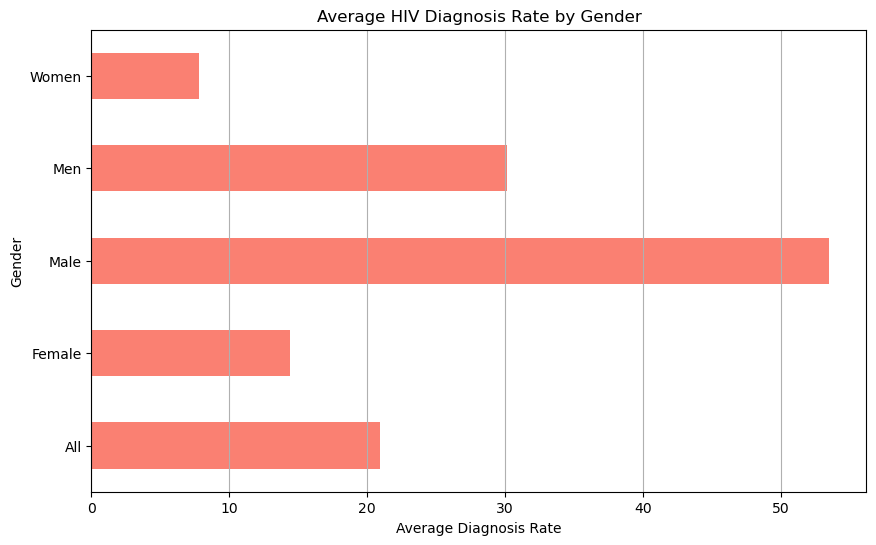

In [45]:
avg_hiv_diagnosis_rate_by_gender = df.groupby("Gender")["HIV diagnosis rate"].mean()
plt.figure(figsize=(10, 6))
avg_hiv_diagnosis_rate_by_gender.plot(kind="barh", color='salmon')
plt.title("Average HIV Diagnosis Rate by Gender")
plt.xlabel("Average Diagnosis Rate")
plt.ylabel("Gender")
plt.grid(axis='x')
plt.show()

### 4. Distribution of HIV diagnoses by race
This pie chart illustrates the distribution of HIV diagnoses among different race groups, providing insights into the prevalence of HIV within each racial demographic.

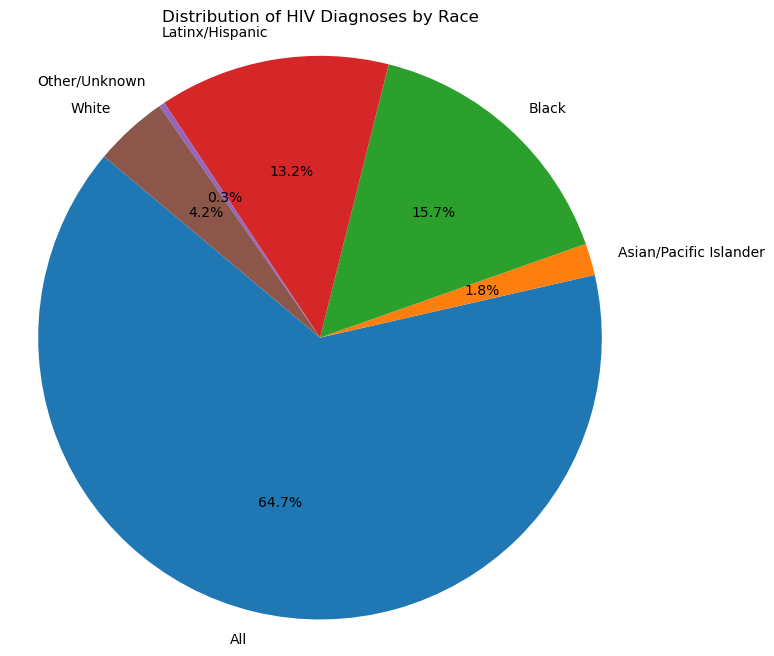

In [46]:
total_hiv_diagnoses_by_race = df.groupby("Race")["HIV diagnoses"].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_hiv_diagnoses_by_race, labels=total_hiv_diagnoses_by_race.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of HIV Diagnoses by Race")
plt.axis('equal')
plt.show()

### 5. Distribution of AIDS diagnoses by borough
This bar chart displays the distribution of AIDS diagnoses across different boroughs, highlighting any disparities in AIDS diagnosis rates among different regions.

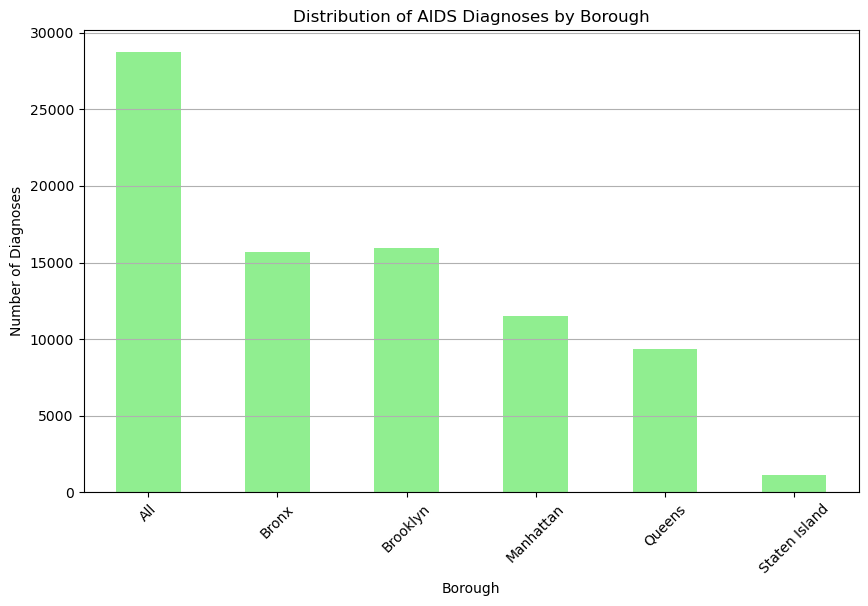

In [47]:
total_aids_diagnoses_by_borough = df.groupby("Borough")["AIDS diagnoses"].sum()
plt.figure(figsize=(10, 6))
total_aids_diagnoses_by_borough.plot(kind="bar", color='lightgreen')
plt.title("Distribution of AIDS Diagnoses by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Diagnoses")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()